<a href="https://colab.research.google.com/github/marcelolandivar/Python_Projects/blob/master/MNIST-1st_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST - Neural Network 
## MLP Classifier using an optimized Neural Net to classify numbers

By: Marcelo Landivar


Handwritten digit recognition has gained so much popularity. We want to implment a Neural Network to classify the images of handwritten digits as 10 digits (0–9). We will use the MNIST dataset available in sklearn. The reason is because it is a balanced, organized and reduced dataset from the original MNIST.

#### Import libraries

In [3]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline


#### Import dataset

In [4]:
digits = datasets.load_digits()

In [5]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [6]:
digits.images.shape

(1797, 8, 8)

In [7]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Now let's display this image

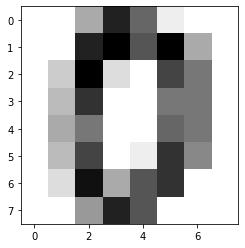

In [8]:
plt.imshow(digits.images[0],cmap='binary')
plt.show()

Originally the image is low resolution. The original digits were of much higher resolution, and the resolution has been decreased when creating the dataset for scikit-learn to make it easier and faster to train a machine learning algorithm to recognize these digits.

In [9]:
print(digits.target.shape)
print(digits.target)

(1797,)
[0 1 2 ... 8 9 8]


**Write a function that plot 16 digits of the dataset, starting with the digit in a specific position that will be specified as parameter of the function**

In [12]:
def plot_multi(i):
    '''Plots 16 digits, starting with digit i'''
    n=16 #number of plots
    plt.figure(figsize=(8,8))
    for a in range(n):
        plt.subplot(4, 4, a+1)
        plt.tight_layout()
        plt.imshow(digits.images[i+a], cmap='binary')
        plt.title('Digit {}'.format(digits.target[i+a]))
        plt.axis('off')
    
    plt.show()
    
    

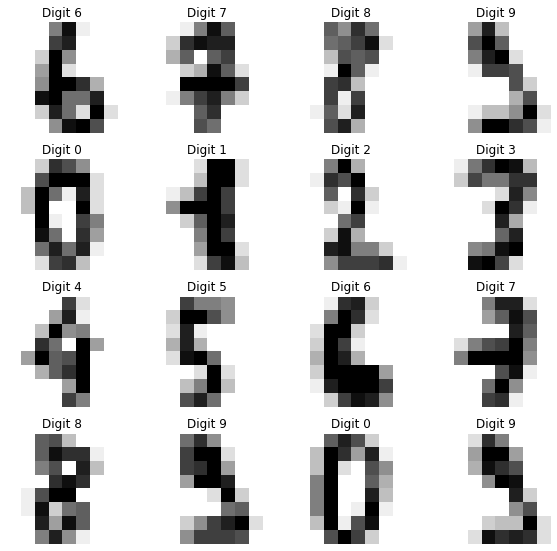

In [13]:
plot_multi(16)

### Building the network and preparing the input data

In [16]:
y = digits.target.reshape(1797)

#One shape dimension can be -1. 
#In this case, the value is inferred from the length of the array and remaining dimensions.

x = digits.data.reshape(1797, -1)
x.shape

(1797, 64)

In [17]:
y.reshape(-1)

array([0, 1, 2, ..., 8, 9, 8])

We now have 1797 flattened images. The two dimensions of our 8x8 images have been collapsed into a single dimension.

Generate the training and test set.

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1437, 64)
(360, 64)
(1437,)
(360,)


#### Now we want to implement a feed-forward neural network using a MLP Classifier. Another aspect to take into account when building a Neural Network is to tune the hyperparameters. It is possible to use the GridSearchCV function of sklearn to find the best parameters for your Neural Net or your algorithm. It takes take to find the optimal parameter, therefore,it is not recommeded to try huge ranges of parameters. It is also possible to use Random Grid Search to get an idea.

[MLP Classifier Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn import neural_network
from sklearn.neural_network import MLPClassifier


parameters = { 'hidden_layer_sizes': np.arange(12, 18),
    'solver': ['sgd','lbfgs', 'adam'],
    'activation': ['logistic', 'tanh', 'relu'],
    'alpha': [0.1 , 0.01 , 0.001 , 0.0001]}

clf_grid = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)


In [ ]:
clf_grid.fit(x,y)

In [ ]:
clf_grid.best_score_

0.9309981429897863

In [ ]:
import datetime
a = datetime.datetime.now()
#clf_grid.fit(x,y)
b = datetime.datetime.now()
c =b - a
print('Time to train: %.2f seconds ' % c.seconds)

print("-----------------Best Model--------------------")


print("Best score: %0.4f" %clf_grid.best_score_)
print("Using the following parameters:")
print(clf_grid.best_params_)

Time to train: 0.00 seconds 
-----------------Best Model--------------------
Best score: 0.9310
Using the following parameters:
{'activation': 'logistic', 'alpha': 0.1, 'hidden_layer_sizes': 17, 'solver': 'adam'}


The gridsearch is very useful to find the optimal parameters for the NN; however, it can several time depending on the size of the dataset and of course the number of parameters to tune and its variations. I had to run more than one time so it was very time demanding. It took around 550 seconds to finish the process. Perhaps with a GPU booster or with a GPU cloud assitance would have been faster. It possible to user RandomSearch since it has more control over the duration of the process. Or try to define the bounds more efficiently.

### Fitting classifier with best parameters

In [ ]:
from sklearn.neural_network import MLPClassifier

### Create an instance of the the MLPClassifier with the best parameters found with gridSearch
mlp = MLPClassifier(activation= 'logistic', alpha= 0.1, hidden_layer_sizes= 17, solver= 'adam',  max_iter=1000)
mlp.fit(X_train, y_train)

### Compute prediction

In [ ]:
predictions = mlp.predict(X_test)

### Model Evaluation using Classification Report

In [ ]:
names_t = digits.target_names.tostring()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.94      0.97      0.96        35
           2       1.00      1.00      1.00        36
           3       0.97      0.97      0.97        29
           4       0.97      1.00      0.98        30
           5       1.00      0.97      0.99        40
           6       1.00      0.98      0.99        44
           7       1.00      0.95      0.97        39
           8       0.95      0.95      0.95        39
           9       0.95      1.00      0.98        41

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



##### Note that in this case we did not need to normliaze data since all the features are in the same scale

In [ ]:
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.999
Accuracy on test set: 0.978


The Classifier has a huge accuracy and optimal parameters. It is a little uncomfortable that the training accuracy is practically 1 and it is a signal of overfitting. However, the accuracy test is pretty high. Perhaps, it is possible to use a regularization method to increase some thousandths to the accuracy on the test set. It also shows that the datasets are very balanced, and it is a very convenient data for a classifier. It is small and vary nice dataset to practic and yet, it took some time to get the optimal parameters. In a more complicated dataset and more extense, it will be necessary to determine when some hyperparameters are better use for a type of data and the differences among them.